# EY - Case Study

In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

## 1) Load & Inspect the data

In [2]:
# load the data
data = pd.read_excel('PAS Sample dataset for analytics casestudy_python.xlsx', sheet_name='copy data', header=3)

# info
print(data.info())

# head
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 31 columns):
Assignment ID                    0 non-null float64
Last Name                        0 non-null float64
First Name                       0 non-null float64
Preferred First Name             0 non-null float64
GUI                              2122 non-null float64
GPN Home                         0 non-null float64
GPN Host                         3 non-null object
Gender                           2125 non-null object
Current Emp Status               2043 non-null object
Current City                     2041 non-null object
Current Country                  2043 non-null object
Start Date Planned Home          1617 non-null datetime64[ns]
End Date Planned Home            1617 non-null datetime64[ns]
Emp Status Home                  1617 non-null object
Assignment Status                1368 non-null object
Home Location                    1617 non-null object
Country Description Home 

,Assignment ID,Last Name,First Name,Preferred First Name,GUI,GPN Home,GPN Host,Gender,Current Emp Status,Current City,...,Rank Code Home,Rank Description Home,Host Location,Country Description Host,Region Host,Area Host,Service Line Description Host,Sub Service Line Host,Rank Code Host,Rank Description Host
0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,M,A,Aberdeen,...,42.0,Senior,Aberdeen,United Kingdom,UKI,EMEIA,Assurance,Financial Stmt Assurance Svcs,42.0,Senior
1,NaN,NaN,NaN,NaN,2.0,NaN,NaN,F,A,Bengaluru,...,NaN,NaN,New York - 5 Times Square,United States,US Nat Offices,Americas,Assurance,Financial Stmt Assurance Svcs,4.0,Client Serving Contractor
2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,M,A,Chiyoda-ku,...,32.0,Manager,Beijing,China,Greater China,Asia-Pacific,Assurance,Financial Stmt Assurance Svcs,32.0,Manager


I will only treat the rows with information, that is, without missing values, as in the Excel file.

In [3]:
# replace the values in the 'Gender' column that do not make sense (3)
data['Gender'] = data['Gender'].replace([1514, 962, 552], [np.nan, np.nan, np.nan])

# create year column
data['year'] = data['Start Date Planned Home'].dt.year.astype('Int64')

# define columns of interest
columns = ['Gender', 'Start Date Planned Home', 'Country Description Home', 'Region Home', 'Area Home', 
           'Service Line Description Home', 'Rank Description Home', 'year']

# treat only information without missing values (as in the excel file)
data = data.loc[data['Region Home'].dropna().index].reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 32 columns):
Assignment ID                    0 non-null float64
Last Name                        0 non-null float64
First Name                       0 non-null float64
Preferred First Name             0 non-null float64
GUI                              1514 non-null float64
GPN Home                         0 non-null float64
GPN Host                         0 non-null object
Gender                           1514 non-null object
Current Emp Status               1493 non-null object
Current City                     1491 non-null object
Current Country                  1493 non-null object
Start Date Planned Home          1514 non-null datetime64[ns]
End Date Planned Home            1514 non-null datetime64[ns]
Emp Status Home                  1514 non-null object
Assignment Status                1155 non-null object
Home Location                    1514 non-null object
Country Description Home 

## 2) Exploratory Data Analysis

Where (Area, Region, Country, Service Line or Rank) should we focus in order to close the Gender gap? Which variables have more impact?

### Gender gap per year

In [4]:
# period: from 2016 till 2019
df = data[data.year >= 2016].copy().reset_index(drop=True)

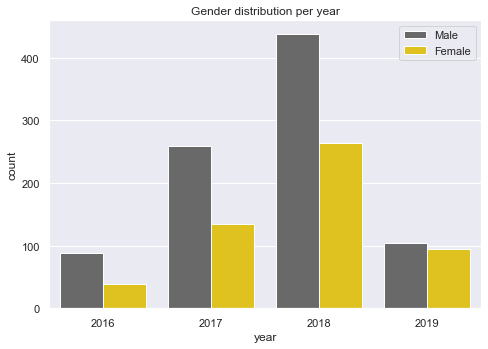

This plot displays the Gender distribution per year, and not cumulatively, as we have already seen in the Excel 
file.

year  Gender
2016  F         0.30
      M         0.70
2017  F         0.34
      M         0.66
2018  F         0.38
      M         0.62
2019  F         0.47
      M         0.53
dtype: float64


In [5]:
# Gender distribution in each year
sns.countplot(x='year', hue='Gender', hue_order=['M', 'F'], data=df, palette={'dimgrey', 'gold'})

# formatting
plt.legend(['Male', 'Female'])
plt.title('Gender distribution per year')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# Note
print("""This plot displays the Gender distribution per year, and not cumulatively, as we have already seen in the Excel 
file.\n""")

# percentagewise
print(round(df.groupby(['year', 'Gender']).size() / df.groupby('year').size(), 2))

### 2.1) Gender gap per Area

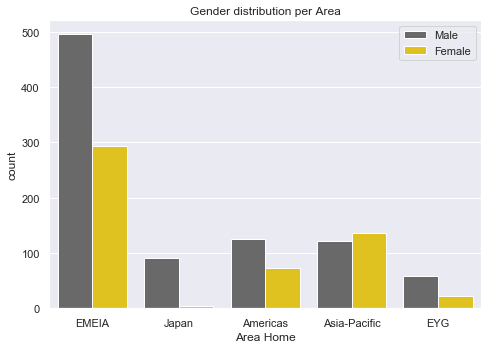

Area Home     Gender
Americas      F         0.37
              M         0.63
Asia-Pacific  F         0.53
              M         0.47
EMEIA         F         0.37
              M         0.63
EYG           F         0.28
              M         0.72
Japan         F         0.05
              M         0.95
dtype: float64


In [6]:
# Gender distribution per Area
sns.countplot(x='Area Home', hue='Gender', hue_order=['M', 'F'], data=df, palette={'dimgrey', 'gold'})

# formatting
plt.legend(['Male', 'Female'])
plt.title('Gender distribution per Area')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# percentagewise
print(round(df.groupby(['Area Home', 'Gender']).size() / df.groupby('Area Home').size(), 2))

There is a wide gender gap in almost all Areas, especially in **Japan**. By contrast, **Asia-Pacific** (which does not include Japan) is very well balanced. 

### 2.2) Gender gap per Region

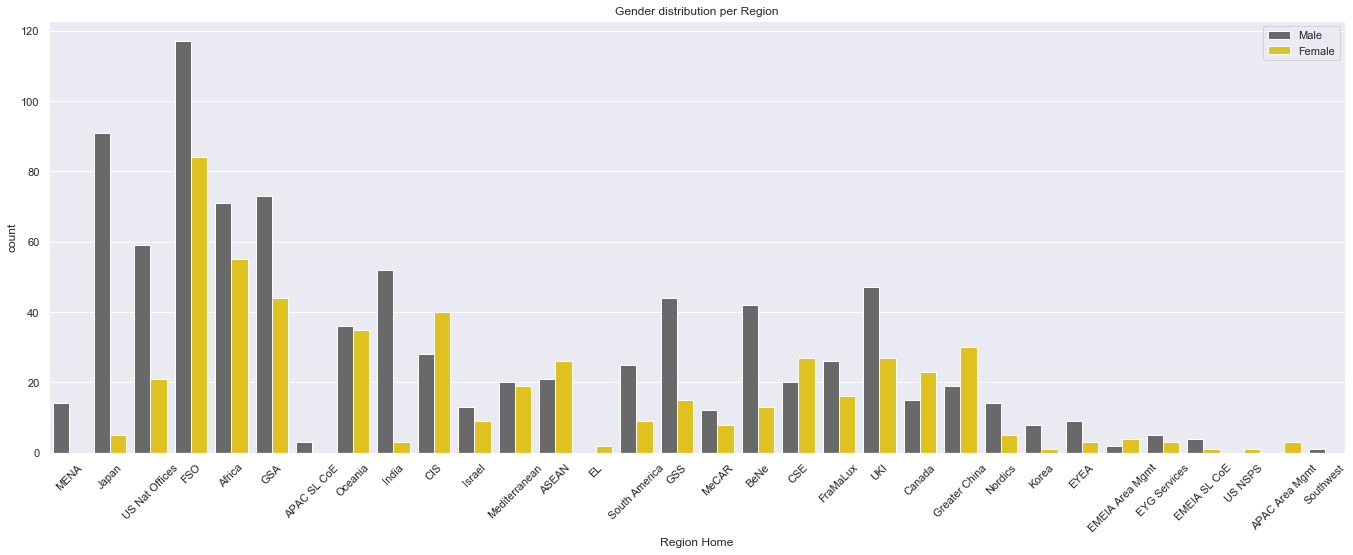

In [7]:
# Gender distribution per Region
sns.countplot(x='Region Home', hue='Gender', hue_order=['M', 'F'], data=df, palette={'dimgrey', 'gold'})

# formatting
plt.legend(['Male', 'Female'], loc=1)
plt.title('Gender distribution per Region')
plt.xticks(rotation=45)
plt.subplots_adjust(left=0, bottom=-0.5, right=3, top=1, wspace=0, hspace=0)
plt.show()

### 2.3) Gender gap per Country

In [8]:
%%script false
# Gender distribution per Country
sns.countplot(x='Country Description Home', hue='Gender', hue_order=['M', 'F'], data=df, palette={'dimgrey', 'gold'})

# formatting
plt.legend(['Male', 'Female'], loc=1)
plt.title('Gender distribution per Country')
plt.xticks(rotation=45)
plt.subplots_adjust(left=0, bottom=-0.5, right=3, top=1, wspace=0, hspace=0)
plt.show()

Couldn't find program: 'false'


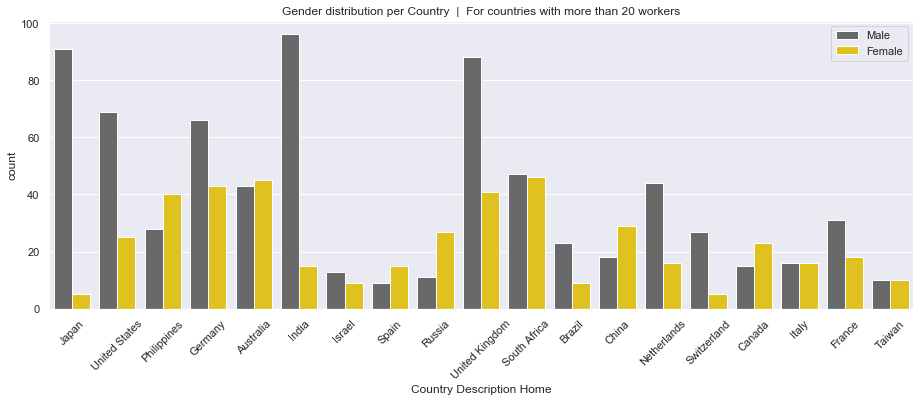

In [9]:
# Select countries with more than n workers

# minimum number of workers 
n = 20

# list of countries with that condition
list_c = list(df['Country Description Home'].value_counts()[df['Country Description Home'].value_counts() >= n].index)

# filtered dataframe
df_countries = df[df['Country Description Home'].isin(list_c)]

# Gender distribution per Country
sns.countplot(x='Country Description Home', hue='Gender', hue_order=['M', 'F'], data=df_countries, 
              palette={'dimgrey', 'gold'})

# formatting
plt.legend(['Male', 'Female'], loc=1)
plt.title('Gender distribution per Country  |  For countries with more than {} workers'.format(n))
plt.xticks(rotation=45)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.show()

### 2.4) Gender gap per Service Line

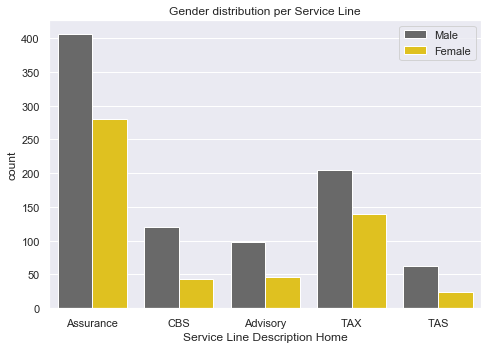

Service Line Description Home  Gender
Advisory                       F         0.32
                               M         0.68
Assurance                      F         0.41
                               M         0.59
CBS                            F         0.26
                               M         0.74
TAS                            F         0.28
                               M         0.72
TAX                            F         0.41
                               M         0.59
dtype: float64


In [10]:
# Gender distribution per Service Line
sns.countplot(x='Service Line Description Home', hue='Gender', hue_order=['M', 'F'], data=df, palette={'dimgrey', 'gold'})

# formatting
plt.legend(['Male', 'Female'], loc=1)
plt.title('Gender distribution per Service Line')
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# percentagewise
print(round(df.groupby(['Service Line Description Home', 'Gender']).size() / 
            df.groupby('Service Line Description Home').size(), 2))

### 2.5) Gender gap per Rank

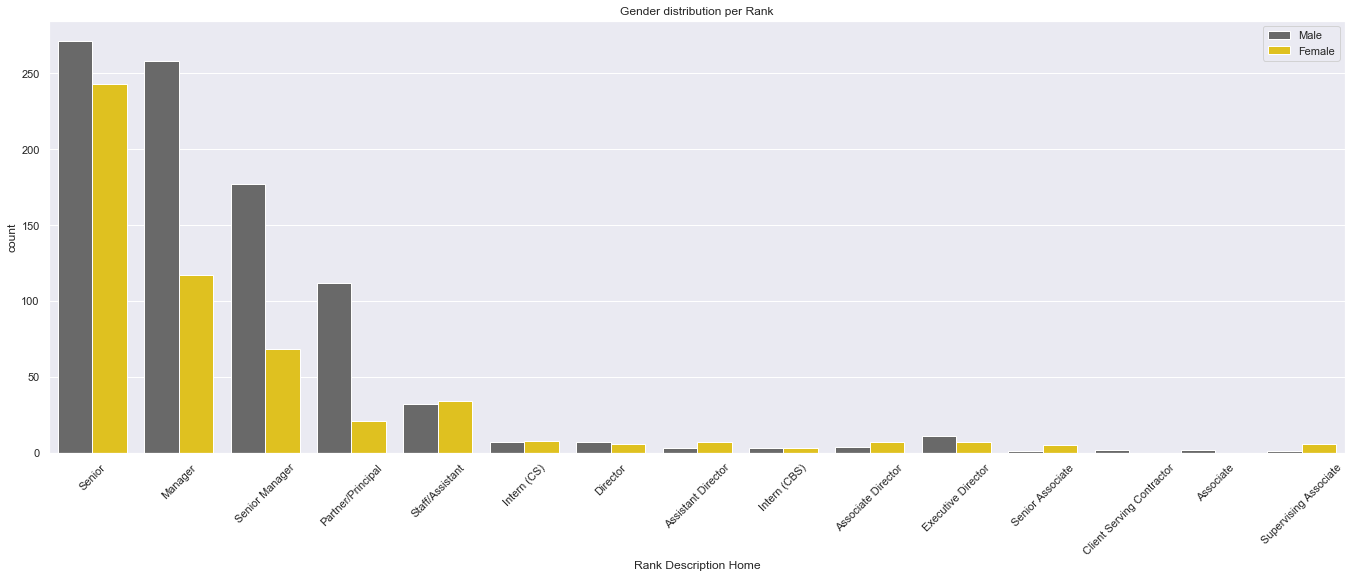

In [11]:
# Gender distribution per Rank
sns.countplot(x='Rank Description Home', hue='Gender', hue_order=['M', 'F'], data=df, palette={'dimgrey', 'gold'})

# formatting
plt.legend(['Male', 'Female'], loc=1)
plt.title('Gender distribution per Rank')
plt.xticks(rotation=45)
plt.subplots_adjust(left=0, bottom=-0.5, right=3, top=1, wspace=0, hspace=0)
plt.show()

### 2.6) Closer analysis

### Countries

If we want to close the Gender gap in a certain country, where should we focus?

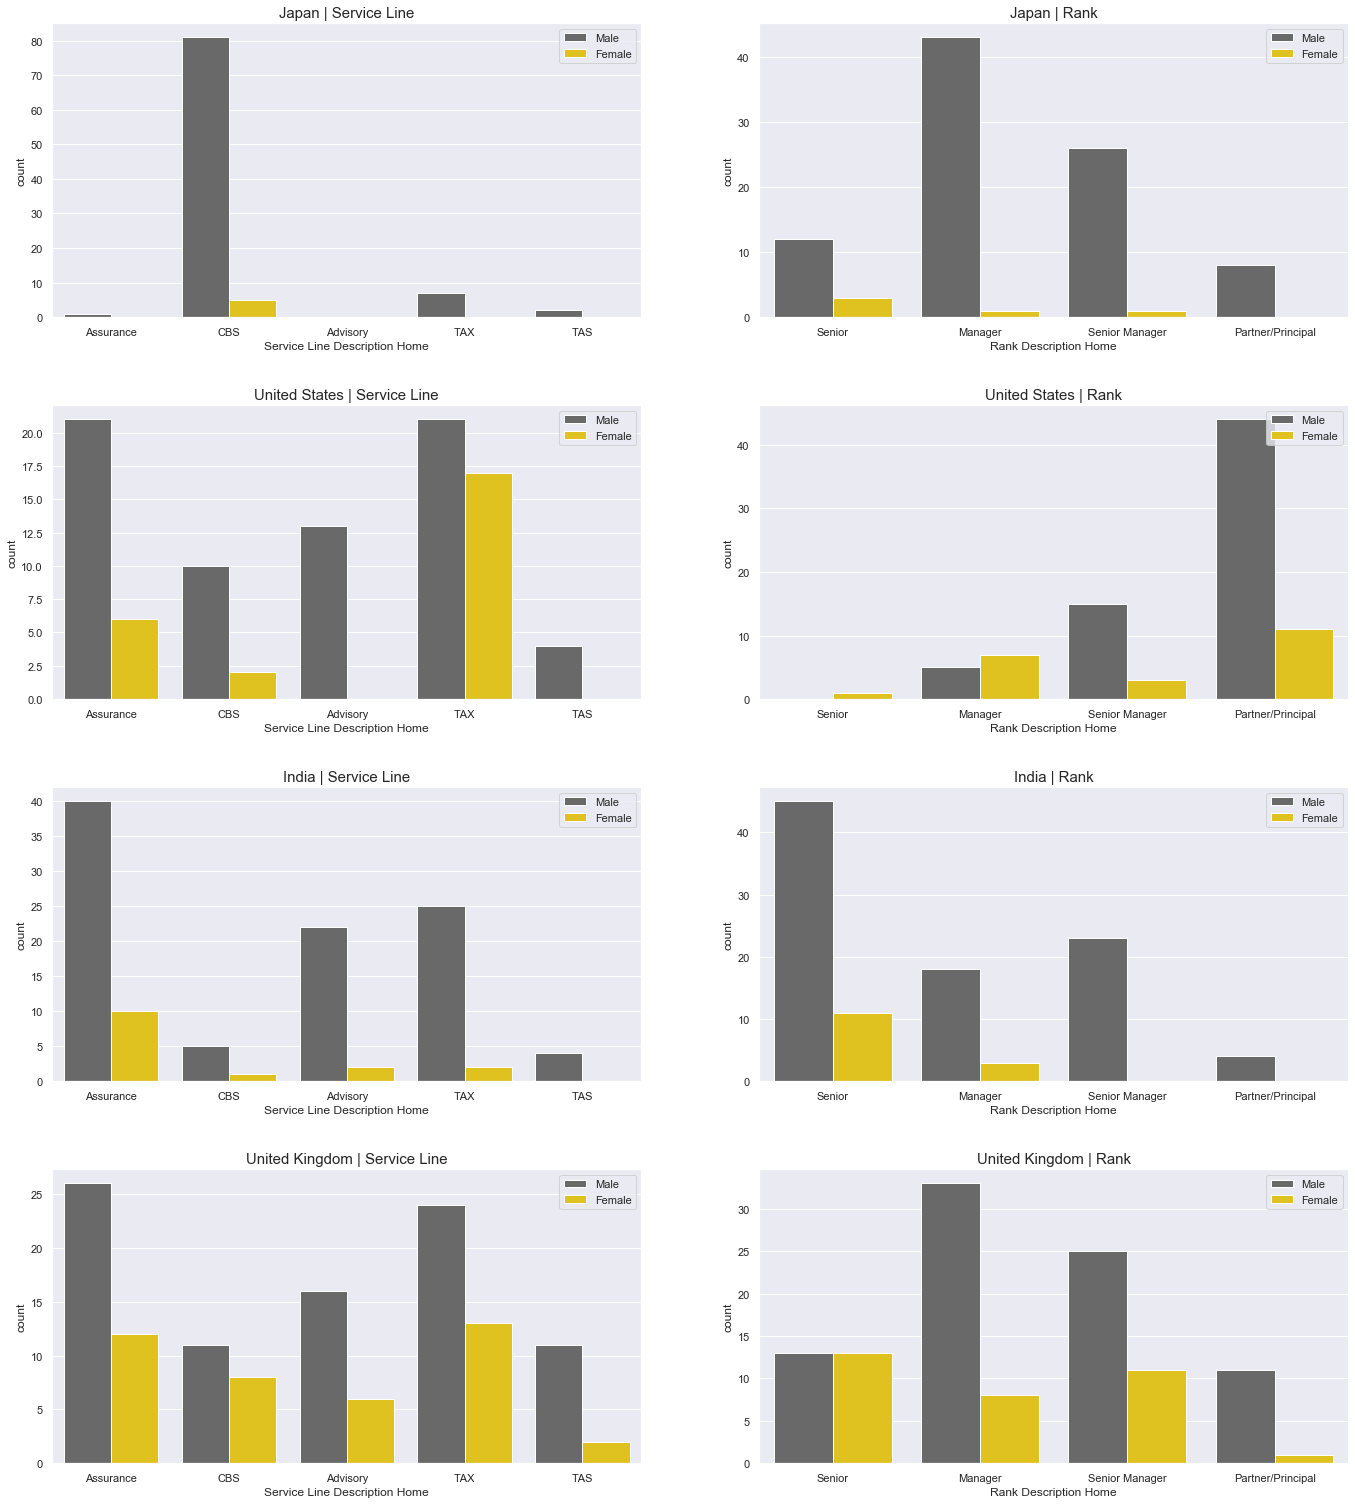

In [25]:
warnings.filterwarnings('ignore')

# select countries & ranks for analysis
countries = ['Japan', 'United States', 'India', 'United Kingdom']
ranks = ['Senior', 'Manager', 'Senior Manager', 'Partner/Principal'] 

# Gender distribution per Country | Service Line & Rank
for i, j in enumerate(countries): 
    # condition for plot
    if i == 0:
        i = i
    else:
        i = i*2
    # discriminate by Service Line
    plt.subplot(int(len(countries)), 2, i + 1)
    sns.countplot(x='Service Line Description Home', hue='Gender', hue_order=['M', 'F'],
                  data=df[df['Country Description Home'] == j],
                  palette={'dimgrey', 'gold'}, order=['Assurance', 'CBS', 'Advisory', 'TAX', 'TAS'])
    plt.legend(['Male', 'Female'], loc=1)
    plt.title('{} | Service Line'.format(j), fontsize=15)

for i, j in enumerate(countries):
    # condition for plot
    if i == 0:
        i = i
    else:
        i = i*2
    # Discriminate by Rank
    plt.subplot(int(len(countries)), 2, i + 2)
    sns.countplot(x='Rank Description Home', hue='Gender', hue_order=['M', 'F'],
                  data=df[(df['Country Description Home'] == j) & (df['Rank Description Home'].isin(ranks))],
                  palette={'dimgrey', 'gold'}, order=ranks)
    plt.legend(['Male', 'Female'], loc=1)
    plt.title('{} | Rank'.format(j), fontsize=15)

plt.subplots_adjust(left=0, bottom=-len(countries), right=3, top=1, wspace=0.2, hspace=0.3)
plt.show()

warnings.filterwarnings('default')

### Service Line, Rank & Gender

Comparing Service Line and Rank and breaking it by Gender:

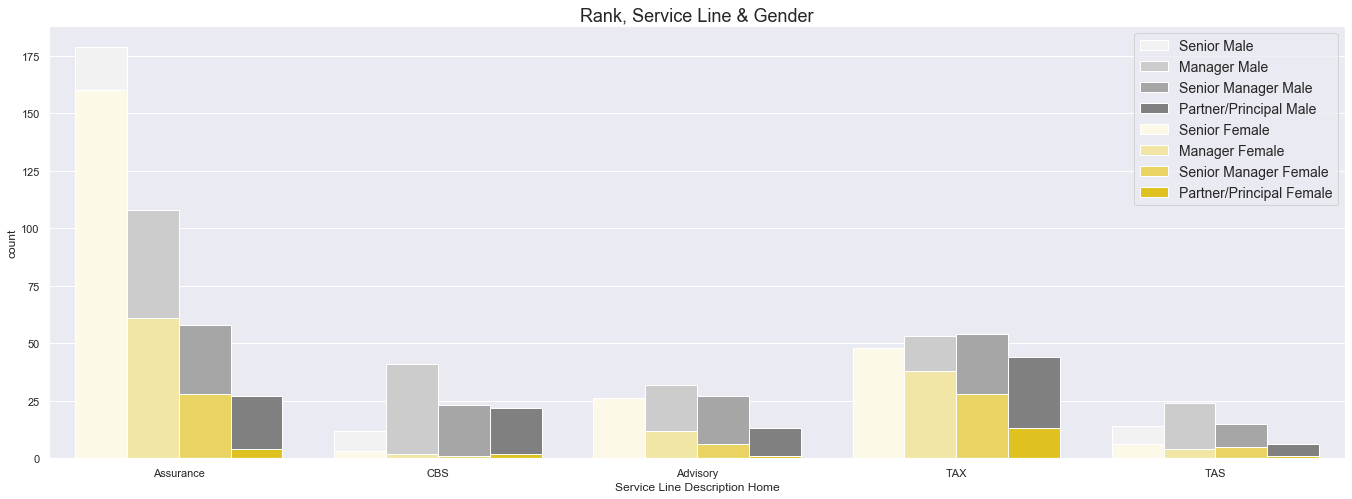

In [24]:
# Select ranks for analysis
ranks = ['Senior', 'Manager', 'Senior Manager', 'Partner/Principal']
df_rank = df[df['Rank Description Home'].isin(ranks)]
sl_order = ['Assurance', 'CBS', 'Advisory', 'TAX', 'TAS']

# plot for Gender "M"
sns.countplot(x='Service Line Description Home', hue='Rank Description Home', 
              data=df_rank[df_rank['Gender'] == 'M'], color="grey", hue_order=ranks, order=sl_order)

# plot for Gender "F"
sns.countplot(x='Service Line Description Home', hue='Rank Description Home', 
              data=df_rank[df_rank['Gender'] == 'F'], color="gold", hue_order=ranks, order=sl_order)

# formatting
plt.title('Rank, Service Line & Gender', fontsize=18)
plt.legend([i+' Male' for i in ranks] + [i+' Female' for i in ranks], fontsize=14)

plt.subplots_adjust(left=0, bottom=-0.5, right=3, top=1, wspace=0.2, hspace=0.3)
plt.show()

#### Individual case: United Kingdom

In [52]:
list_countries = np.sort(list_countries)
list_countries

array(['Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Belgium', 'Brazil', 'Bulgaria', 'Cameroon', 'Canada',
       'Cayman Islands', 'Chile', 'China', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kenya', 'Korea, Republic of', 'Kuwait', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Moldova, Republic of', 'Mongolia', 'Netherlands', 'New Zealand',
       'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal',
       'Romania', 'Russia', 'Rwanda', 'Saudi Arabia',
       'Serbia, Republic of', 'Singapore', 'Slovakia', 'South Africa',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Tanzania', 'Turkey',
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Vietnam', 'Zimbabwe'], dtype

In [57]:
from bokeh.io import output_notebook
output_notebook()


Loading BokehJS ...

In [58]:
from bokeh.io import show
from bokeh.models import Select
from bokeh.layouts import widgetbox

def exercício(doc):
    # Create two dropdown Select widgets: select1, select2
    select1 = Select(title='First', options=['A', 'B'], value='A')
    select2 = Select(title='Second', options=['1', '2', '3'], value='1')

    # Define a callback function: callback
    def callback(attr, old, new):
        # If select1 is 'A' 
        if select1.value == 'A':
            # Set select2 options to ['1', '2', '3']
            select2.options = ['1', '2', '3']

            # Set select2 value to '1'
            select2.value = '1'
        else:
            # Set select2 options to ['100', '200', '300']
            select2.options = ['100', '200', '300']

            # Set select2 value to '100'
            select2.value = '100'

    # Attach the callback to the 'value' property of select1
    select1.on_change('value', callback)

    # Create layout and add to current document
    layout = widgetbox(select1, select2)
    doc.add_root(layout)

show(exercício)



ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'http://localhost:8889';                       use --allow-websocket-origin=localhost:8889 or set BOKEH_ALLOW_WS_ORIGIN=localhost:8889 to permit this; currently we allow origins {'localhost:8888'}


In [ ]:
# Select country
country = 'United Kingdom'

# Select ranks for analysis
ranks = ['Senior', 'Manager', 'Senior Manager', 'Partner/Principal']
df_rank_country = df[(df['Rank Description Home'].isin(ranks)) & (df['Country Description Home'] == country)]
sl_order = ['Assurance', 'CBS', 'Advisory', 'TAX', 'TAS']

# plot for Gender "M"
sns.countplot(x='Service Line Description Home', hue='Rank Description Home', 
              data=df_rank_country[df_rank_country['Gender'] == 'M'], color="grey", hue_order=ranks, order=sl_order)

# plot for Gender "F"
sns.countplot(x='Service Line Description Home', hue='Rank Description Home', 
              data=df_rank_country[df_rank_country['Gender'] == 'F'], color="gold", hue_order=ranks, order=sl_order)

# formatting
plt.title('{}: Rank, Service Line & Gender'.format(country), fontsize=18)
plt.legend([i+' Male' for i in ranks] + [i+' Female' for i in ranks], fontsize=14, loc=1)

plt.subplots_adjust(left=0, bottom=-0.5, right=3, top=1, wspace=0.2, hspace=0.3)
plt.show()

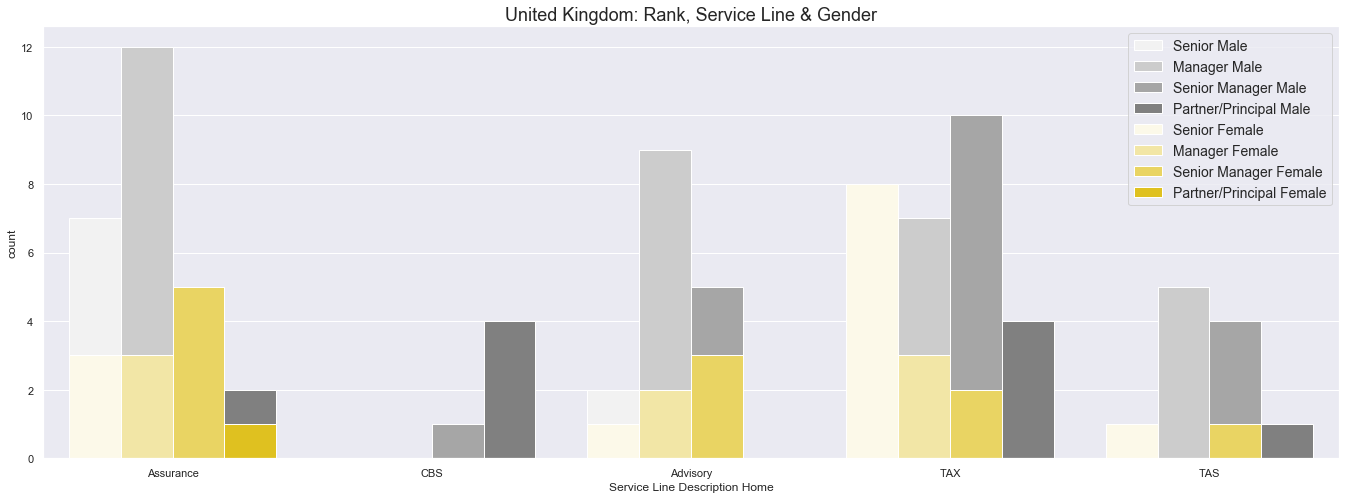

In [14]:
# Select country
country = 'United Kingdom'

# Select ranks for analysis
ranks = ['Senior', 'Manager', 'Senior Manager', 'Partner/Principal']
df_rank_country = df[(df['Rank Description Home'].isin(ranks)) & (df['Country Description Home'] == country)]
sl_order = ['Assurance', 'CBS', 'Advisory', 'TAX', 'TAS']

# plot for Gender "M"
sns.countplot(x='Service Line Description Home', hue='Rank Description Home', 
              data=df_rank_country[df_rank_country['Gender'] == 'M'], color="grey", hue_order=ranks, order=sl_order)

# plot for Gender "F"
sns.countplot(x='Service Line Description Home', hue='Rank Description Home', 
              data=df_rank_country[df_rank_country['Gender'] == 'F'], color="gold", hue_order=ranks, order=sl_order)

# formatting
plt.title('{}: Rank, Service Line & Gender'.format(country), fontsize=18)
plt.legend([i+' Male' for i in ranks] + [i+' Female' for i in ranks], fontsize=14, loc=1)

plt.subplots_adjust(left=0, bottom=-0.5, right=3, top=1, wspace=0.2, hspace=0.3)
plt.show()

### How to define the "worst" cases?

\begin{align}
\% Males * (Nr Males - Nr Females)
\end{align}

In [15]:
%%time
# define df_index
df_index = pd.DataFrame(columns=['Country', 'Service Line', 'Rank', 'Index'])

# lists
list_countries = df['Country Description Home'].unique()
list_services = df['Service Line Description Home'].unique()
list_ranks = df['Rank Description Home'].unique()

# build the df_index
location = 0
for country in list_countries:
    for service in list_services:
        for rank in list_ranks:
            # filtered country, service and rank
            df_filtered = df[(df['Country Description Home'] == country) & 
                             (df['Service Line Description Home'] == service) & 
                             (df['Rank Description Home'] == rank)].Gender.value_counts()
                        
            # compute index 
            if len(df_filtered) == 0:
                index = np.nan
            elif len(df_filtered) == 1:
                index = df_filtered[0]/df_filtered.sum() * (df_filtered[0] - 0)
            else:
                index = df_filtered[0]/df_filtered.sum() * (df_filtered[0] - df_filtered[1])
            
            # fill df_index
            df_index.loc[location] = [country, service, rank, index]
            
            # next iteration
            location = location + 1
            

Wall time: 1min 34s


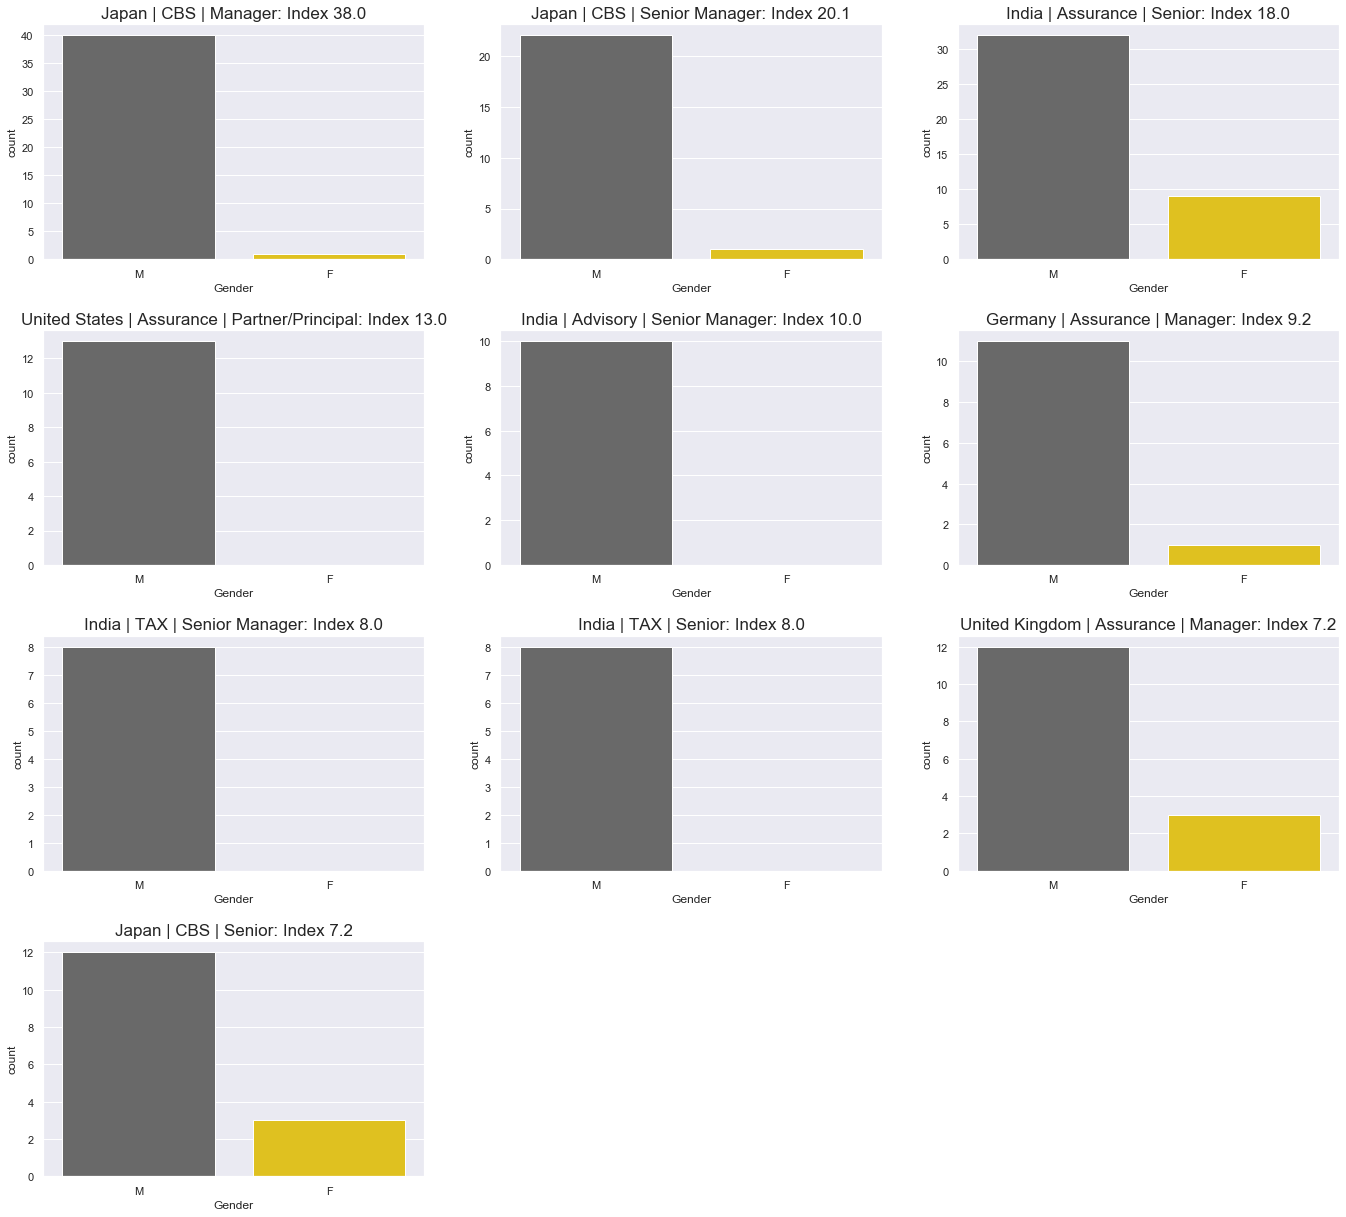

,Country,Service Line,Rank,Index
0,Japan,CBS,Manager,38.048780
1,Japan,CBS,Senior Manager,20.086957
2,India,Assurance,Senior,17.951220
3,United States,Assurance,Partner/Principal,13.000000
4,India,Advisory,Senior Manager,10.000000
5,Germany,Assurance,Manager,9.166667
6,India,TAX,Senior Manager,8.000000
7,India,TAX,Senior,8.000000
8,United Kingdom,Assurance,Manager,7.200000
9,Japan,CBS,Senior,7.200000


In [16]:
# n worst cases
n = 10

df_sorted = df_index.sort_values('Index', ascending=False).head(n).reset_index(drop=True)

for i in range(len(df_sorted)):
    df_sup = df_sorted.iloc[i]
    # plot
    plt.subplot(np.ceil(len(df_sorted)/3), 3, i+1)
    sns.countplot(df[(df['Country Description Home'] == df_sup['Country']) & 
                 (df['Service Line Description Home'] == df_sup['Service Line']) & 
                 (df['Rank Description Home'] == df_sup['Rank'])].Gender,
                  palette={'dimgrey', 'gold'}, order=['M', 'F'])
    plt.title('{} | {} | {}: Index {}'.format(df_sup['Country'], df_sup['Service Line'], df_sup['Rank'], 
                                              round(df_sup['Index'], 1)), fontsize=17)
    
plt.subplots_adjust(left=0, bottom=-int(len(df_sorted)/3), right=3, top=1, wspace=0.2, hspace=0.3)
plt.show() 
df_sorted

### 3) Female Forecast: Interactive Chart

In [17]:
df_chart = df[columns].drop(['Start Date Planned Home'], axis=1)
df_chart.head()

,Gender,Country Description Home,Region Home,Area Home,Service Line Description Home,Rank Description Home,year
0,M,Egypt,MENA,EMEIA,Assurance,Senior,2018
1,M,Japan,Japan,Japan,CBS,Manager,2017
2,M,United States,US Nat Offices,Americas,Advisory,Senior Manager,2018
3,F,United States,US Nat Offices,Americas,TAX,Partner/Principal,2016
4,F,Philippines,FSO,Asia-Pacific,Assurance,Manager,2019
